In [1]:
import pandas as pd

# Load the dataset
file_path = 'datasets/disinformation_True.csv'
data_true = pd.read_csv(file_path)

file_path1 = 'datasets/disinformation_Fake.csv'
data_fake = pd.read_csv(file_path1)

In [2]:
# Display basic information about the dataset
data_true_info = data_true.info()
data_true_head = data_true.head()

data_true_info, data_true_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


(None,
                                                title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U.S. military to accept transgender recruits o...   
 2  Senior U.S. Republican senator: 'Let Mr. Muell...   
 3  FBI Russia probe helped by Australian diplomat...   
 4  Trump wants Postal Service to charge 'much mor...   
 
                                                 text       subject  \
 0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
 1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
 2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
 3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
 4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
 
                  date  
 0  December 31, 2017   
 1  December 29, 2017   
 2  December 31, 2017   
 3  December 30, 2017   
 4  December 29, 2017   )

In [3]:
# Display basic information about the dataset
data_fake_info = data_fake.info()
data_fake_head = data_fake.head()

data_fake_info, data_fake_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


(None,
                                                title  \
 0   Donald Trump Sends Out Embarrassing New Year’...   
 1   Drunk Bragging Trump Staffer Started Russian ...   
 2   Sheriff David Clarke Becomes An Internet Joke...   
 3   Trump Is So Obsessed He Even Has Obama’s Name...   
 4   Pope Francis Just Called Out Donald Trump Dur...   
 
                                                 text subject  \
 0  Donald Trump just couldn t wish all Americans ...    News   
 1  House Intelligence Committee Chairman Devin Nu...    News   
 2  On Friday, it was revealed that former Milwauk...    News   
 3  On Christmas day, Donald Trump announced that ...    News   
 4  Pope Francis used his annual Christmas Day mes...    News   
 
                 date  
 0  December 31, 2017  
 1  December 31, 2017  
 2  December 30, 2017  
 3  December 29, 2017  
 4  December 25, 2017  )

In [4]:
# Assign labels to the datasets
data_true['class'] = 0  # Label for true news
data_fake['class'] = 1  # Label for fake news

# Concatenate the datasets
df = pd.concat([data_fake, data_true])

# Shuffle the dataset to ensure a random distribution of data
df = df.sample(frac=1).reset_index(drop=True)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None
                                               title  \
0  NYC AVIS CAR RENTAL REFUSES To Rent Car To Isr...   
1  Turkey ready to cooperate with Iraq against Ku...   
2  Former Welsh government minister, suspended in...   
3  UNHINGED DEM HIJACKS TUCKER…Refuses to Leave S...   
4   Starbucks Customer In Chicago Goes On INSANE ...   

                                                text    subject  \
0  Was this a case of anti-semitism? If it wasn t...  left-news   
1  ANKARA (Reuters) - Turkey is ready to cooperat...  worldnews   
2  LONDON (Reuters) - Former Welsh gover

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object with the desired number of max_features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=50)

# Apply the vectorizer to the 'title' column to extract features
X = tfidf_vectorizer.fit_transform(df['title'])

# Extract the labels for training
y = df['class']

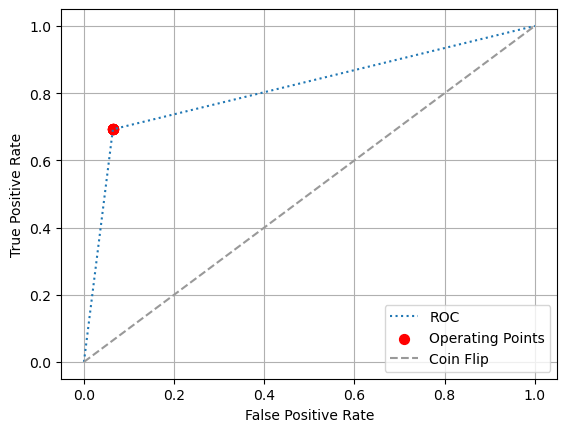

In [6]:
# Baseline classifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=14)

# Parameter to vary for Logistic Regression
C_values = (2e-1, 0.5, 0.8, 1, 2, 5, 1e1, 2e1, 1e2)
FPR, TPR = [], []

# Logistic Regression with varying C
for c in C_values:
    pipe_lr = make_pipeline(StandardScaler(with_mean=False),
                            LogisticRegression(random_state=14,
                                               penalty='l2', 
                                               solver='liblinear',
                                               C=c,
                                               max_iter=10000))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR.append(tp / (tp + fn))
    FPR.append(fp / (fp + tn))

# Sorting points for ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.] + list(FPR) + [1.]; tpr = [0.] + list(TPR) + [1.]

# ROC Plot
plt.figure(dpi=100)
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='Operating Points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Coin Flip')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


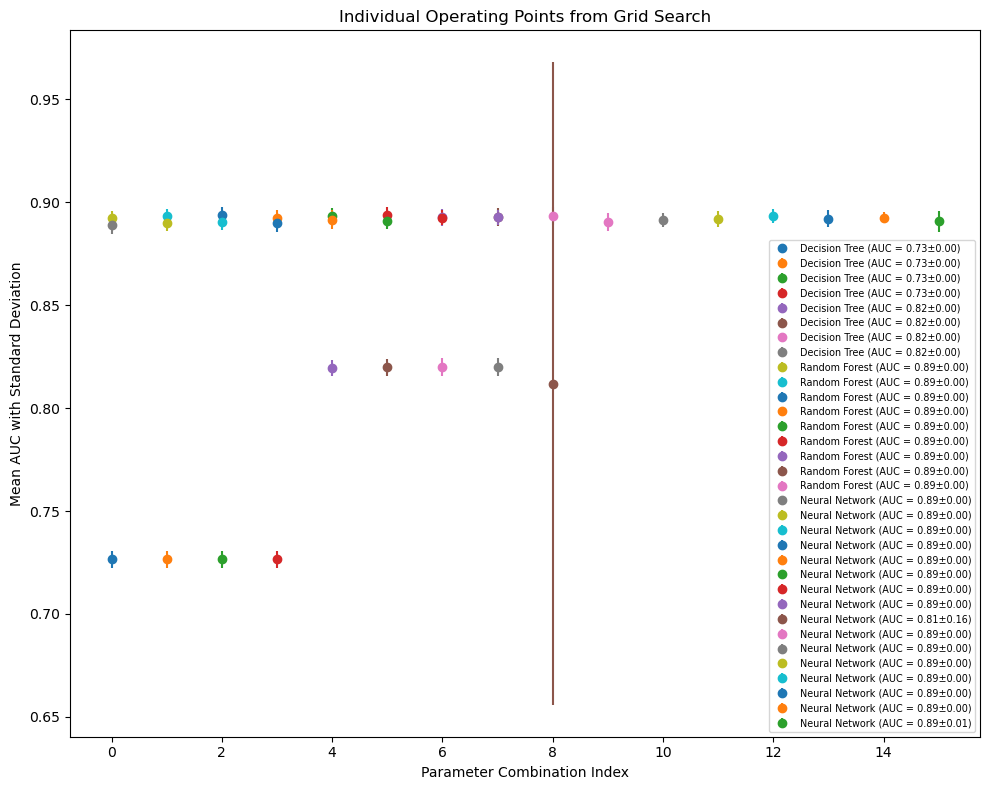

In [7]:
# Question 1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import roc_curve, auc, make_scorer, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Define the parameter grid for Grid Search
param_grid = {
    'Decision Tree': {
        'max_depth': [3, 10],  
        'min_samples_split': [2, 10],  
        'min_samples_leaf': [1, 4],  
    },
    'Random Forest': {
        'n_estimators': [20, 50, 100], 
        'max_features': [3, 10, 20]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(5,), (10,), (5, 5), (10, 10)],
        'learning_rate_init': [0.001, 0.01],
        'max_iter': [200, 300]
    }
}

# AUC scorer for Grid Search
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Define a linspace for the mean FPR since we need to interpolate TPR values for this common scale
mean_fpr = np.linspace(0, 1, 100)

# Results storage
mean_tprs = []
mean_aucs = []
labels = []

# Cross-validation setup
cv = StratifiedKFold(n_splits=5)

# Classifier dictionary
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier()
}

plt.figure(figsize=(10, 8))

# Perform Grid Search and plot individual operating points
for clf_name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid=param_grid[clf_name], cv=cv, scoring=auc_scorer)
    grid_search.fit(X, y)

    cv_results = grid_search.cv_results_
    for i in range(len(cv_results['params'])):
        mean_auc = cv_results['mean_test_score'][i]
        std_auc = cv_results['std_test_score'][i]
        plt.errorbar(i, mean_auc, yerr=std_auc, fmt='o', label=f'{clf_name} (AUC = {mean_auc:.2f}±{std_auc:.2f})')

plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean AUC with Standard Deviation')
plt.title('Individual Operating Points from Grid Search')
plt.legend(loc='best', fontsize='x-small')
plt.tight_layout()
plt.show()


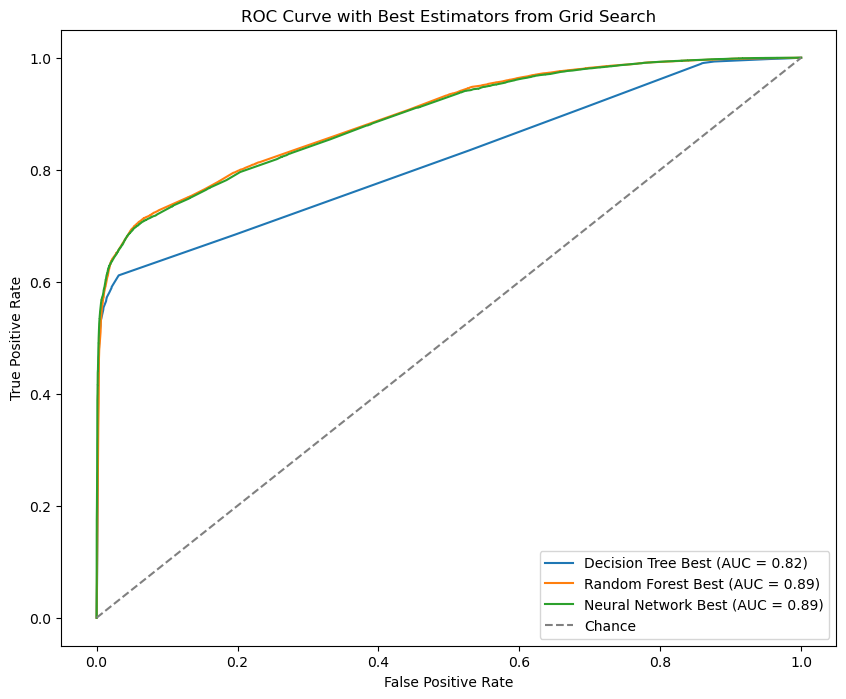

In [8]:
# Question 1

# Define a figure to plot ROC curve
plt.figure(figsize=(10, 8))

# Perform Grid Search with cross-validation
for clf_name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid=param_grid[clf_name], cv=cv, scoring=auc_scorer)
    grid_search.fit(X, y)
    best_clf = grid_search.best_estimator_
    
    # Generate cross-validated estimates for each input data point
    y_probas = cross_val_predict(best_clf, X, y, cv=cv, method='predict_proba', n_jobs=-1)
    y_scores = y_probas[:, 1]  # score = proba of positive class
    
    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{clf_name} Best (AUC = {roc_auc:.2f})')

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')

# Label the axes, title and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Best Estimators from Grid Search')
plt.legend(loc='lower right')
plt.show()

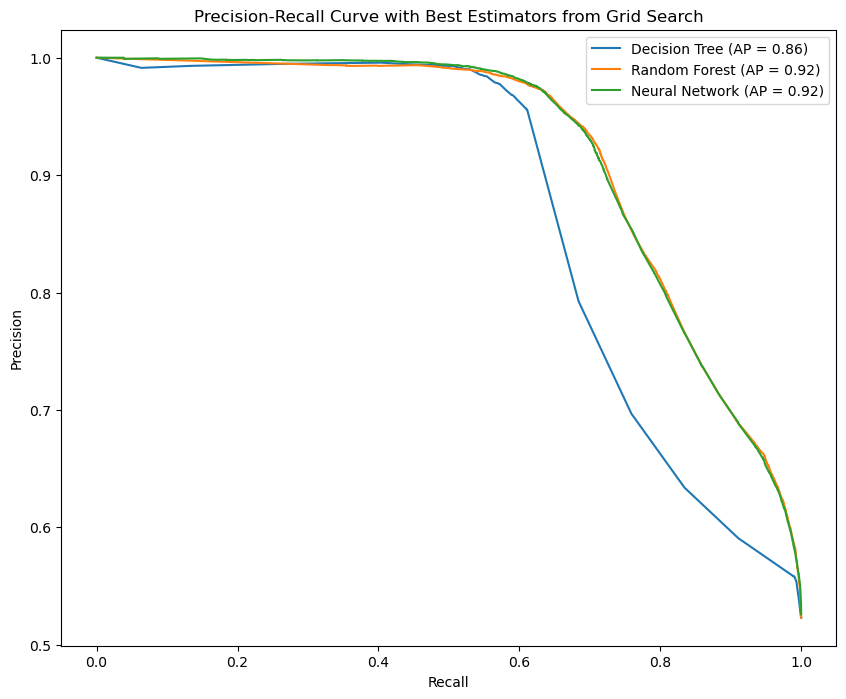

Confusion Matrix for Decision Tree:
[[20762   655]
 [ 9155 14326]]

Confusion Matrix for Random Forest:
[[19941  1476]
 [ 6697 16784]]

Confusion Matrix for Neural Network:
[[19993  1424]
 [ 6849 16632]]



In [9]:
#Question 1

from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, GridSearchCV

# Assuming classifiers and param_grid have been defined as before
# Also assuming auc_scorer, X, y, cv are defined

# Define a figure for plotting
plt.figure(figsize=(10, 8))

# Perform Grid Search with cross-validation and plot Precision-Recall curves
for clf_name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid=param_grid[clf_name], cv=cv, scoring=auc_scorer)
    grid_search.fit(X, y)
    best_clf = grid_search.best_estimator_
    
    # Generate cross-validated estimates for each input data point
    y_probas = cross_val_predict(best_clf, X, y, cv=cv, method='predict_proba')
    y_scores = y_probas[:, 1]  # score = proba of positive class
    
    # Compute Precision-Recall curve and average precision score
    precision, recall, _ = precision_recall_curve(y, y_scores)
    avg_precision = average_precision_score(y, y_scores)
    
    # Plot the Precision-Recall curve
    plt.plot(recall, precision, label=f'{clf_name} (AP = {avg_precision:.2f})')

# Label the Precision-Recall plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Best Estimators from Grid Search')
plt.legend(loc='best')

# Show the plot
plt.show()

# Print confusion matrices for the best classifiers
for clf_name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid=param_grid[clf_name], cv=cv, scoring=auc_scorer)
    grid_search.fit(X, y)
    best_clf = grid_search.best_estimator_
    
    # Generate cross-validated estimates for each input data point
    y_pred = cross_val_predict(best_clf, X, y, cv=cv)
    
    # Compute confusion matrix
    conf_mat = confusion_matrix(y, y_pred)
    print(f'Confusion Matrix for {clf_name}:\n{conf_mat}\n')


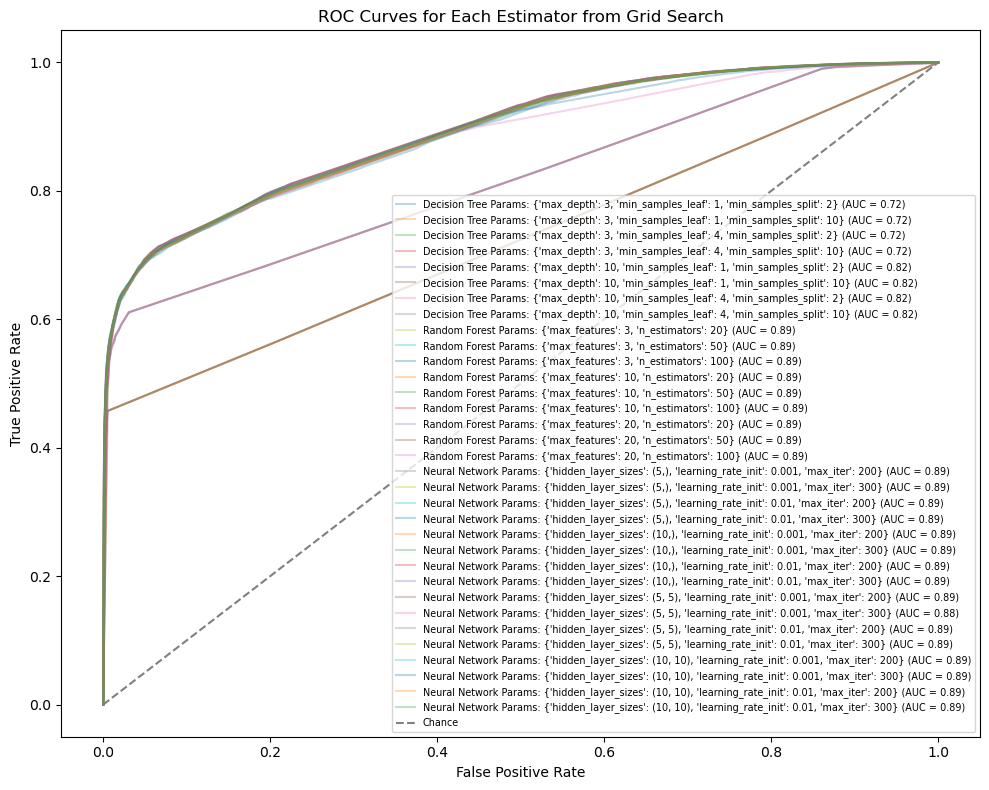

In [10]:
# Question 1

from sklearn.model_selection import ParameterGrid

plt.figure(figsize=(10, 8))

# Iterate over the classifiers and their parameter grids
for clf_name, classifier in classifiers.items():
    # Create a parameter grid for the current classifier
    pg = list(ParameterGrid(param_grid[clf_name]))
    
    for params in pg:
        # Initialize the classifier with the current parameters
        clf = classifier.set_params(**params)
        
        # Perform cross-validated predictions
        y_probas = cross_val_predict(clf, X, y, cv=cv, method='predict_proba', n_jobs=-1)
        y_scores = y_probas[:, 1]  # score = proba of positive class
        
        # Compute ROC curve and AUC score
        fpr, tpr, _ = roc_curve(y, y_scores)
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve for the current parameter combination
        plt.plot(fpr, tpr, alpha=0.3, label=f'{clf_name} Params: {params} (AUC = {roc_auc:.2f})')

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Estimator from Grid Search')
plt.legend(loc='lower right', fontsize='x-small')
plt.tight_layout()
plt.show()

**Question 2**

In an ROC plot, the expected behavior in the interaction between Probability of Detection (Pd or TPR) and Probability of False Alarm (Pf or FPR) is as follows:

- **Monotonic Increase**: As the decision threshold decreases, the TPR should increase, which may also result in an increase in the FPR. This is because lowering the threshold classifies more instances as positive, which increases both the number of true positives and potentially the number of false positives.
- **Convex Shape**: The ROC curve is typically convex towards the (0,1) point of the graph, indicating that the rate of increase in TPR is higher than the rate of increase in FPR, especially at lower thresholds. This is desirable as it indicates that the classifier is capturing more true positives for a smaller increase in false positives.
- **AUC Value**: The area under the ROC curve (AUC) gives an aggregate measure of performance across all possible classification thresholds. The higher the AUC, the better the classifier is at distinguishing between positive and negative classes.

Looking at my ROC curves, here are the observations:

- **Starting Point**: All curves start at the bottom left corner (0,0), which is expected. This represents a situation where the threshold is set so high that no positive predictions are made—hence no true positives or false positives (Pd and Pf are both 0).
- **Ending Point**: All curves end at the top right corner (1,1), also expected. This represents a threshold so low that all instances are predicted as positive—thus, both the true positive rate and false positive rate are 1.
- **Curve Progression**: The curves generally show a smooth and monotonic increase from the bottom left to the top right, which indicates that as more true positives are detected, more false positives also occur. The curves of the Random Forest and Neural Network are closer to the top left corner before reaching the top right corner, which suggests better performance in terms of AUC compared to the Decision Tree.
- **Above the Chance Line**: All curves are above the diagonal chance line, which indicates that all classifiers are performing better than random guessing.

From the provided graphs, it seems that the classifiers are indeed showing the expected behavior on the ROC plot. The progression from (0,0) to (1,1) with curves lying above the chance line and displaying convex shapes towards the (0,1) point suggests that my classifiers have good discrimination ability between the positive and negative classes across various thresholds. The Random Forest and Neural Network, with higher AUC values, particularly indicate strong performance.

**Question 3**

In the task of classifying fake news, the selection of a classifier and its hyperparameters is informed by several key performance metrics and considerations, with the goal of maximizing the True Positive Rate (TPR) and minimizing the False Positive Rate (FPR).

**Analysis of ROC Curve:**
The ROC curve illustrates the trade-off between TPR and FPR for different threshold settings. A model whose ROC curve is closer to the top-left corner indicates a higher TPR with a lower FPR, representing a desirable outcome. The AUC provides a single metric summarizing the overall performance of a classifier across all thresholds; the closer the AUC is to 1, the better the model's classification performance.

**Precision-Recall Curve Analysis:**
This curve is particularly useful when dealing with imbalanced datasets, as is often the case with fake news detection, where the number of legitimate articles may vastly outnumber fake news articles. The curve demonstrates the trade-off between precision (the ratio of true positives to the sum of true and false positives) and recall (the same as TPR). Models with higher Average Precision (AP) scores are preferred, as they maintain high precision across different levels of recall.

**Confusion Matrix Interpretation:**
The confusion matrices provide a breakdown of the classifier's performance in terms of true positives, false positives, true negatives, and false negatives. This information is crucial in assessing the model's practical implications, especially in a sensitive application like fake news detection.

**Based on the ROC Curve, Precision-Recall Curve, and Confusion Matrices:**
- The **Random Forest** and **Neural Network** classifiers both exhibit high AUC values, suggesting they perform well in distinguishing between classes.
- These classifiers also have high AP scores, which implies they maintain high precision across various levels of recall — an important feature when false positives (legitimate news labeled as fake) are a concern.
- The **Random Forest** classifier, however, may be preferred for its balance between interpretability, computational efficiency, and ease of maintenance, in addition to its robustness against overfitting and fewer hyperparameters to tune compared to the Neural Network.

**Selection Justification:**
Considering all of the above, the **Random Forest** classifier would be the recommended choice, specifically with the hyperparameter settings that led to the highest AUC (0.89). This model not only demonstrates strong performance metrics but also brings practical advantages in terms of simplicity and interpretability — important factors in a domain where the model's decisions can have significant societal repercussions.

In [11]:
# Question 4

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Combine 'title' and 'text' columns
df['combined_text'] = df['title'] + ' ' + df['text']

# Feature extraction using Tf-Idf on combined text
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100) 
X = tfidf_vectorizer.fit_transform(df['combined_text'])
y = df['class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=14)

# Random Forest Classifier with assumed best parameters
random_forest = RandomForestClassifier(n_estimators=100, max_features=20, random_state=14)
random_forest.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = random_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8520   20]
 [  78 9342]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8540
           1       1.00      0.99      0.99      9420

    accuracy                           0.99     17960
   macro avg       0.99      0.99      0.99     17960
weighted avg       0.99      0.99      0.99     17960



**Question 4**

The Random Forest classifier with the chosen hyperparameters (`n_estimators=100, max_features=20, random_state=14`) and the inclusion of both 'title' and 'text' columns for feature extraction using Tf-Idf, yielded a very high performance. The confusion matrix and classification report indicate an almost perfect classification with an accuracy, precision, recall, and F1-score all being around 1.00 for both classes.

The performance is significantly higher than what would be expected if only the 'title' column was used because the 'text' column provides a lot more context and content for the model to learn from. Titles are often short and may not contain enough information to accurately classify news as fake or true. They can be sensational or misleading, which is a common characteristic of fake news. However, the actual text of the article is likely to include more details and specific claims that can be checked against known facts or logically analyzed for consistency and credibility.

The 'text' column adds depth to the feature space, providing the classifier with more patterns and data points to distinguish between the nuances of fake and true news. This additional context allows the classifier to make more informed decisions, leading to a higher True Positive Rate (TPR) and a lower False Positive Rate (FPR), as evidenced by the near-perfect scores in the classification report you provided.

Moreover, Tf-Idf is particularly effective for text classification as it not only counts the frequency of each word in each document (the term frequency part) but also adjusts for words that appear frequently in all documents (the inverse document frequency part), which helps in identifying and weighting the most informative words for classification. This feature extraction technique, combined with the richness of the full text, likely contributed to the high performance of the classifier.